<a href="https://colab.research.google.com/github/RoseManoj/Wine-Prediction-DS-/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/winequalityN.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df1=df.copy()
df1

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
#describe
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
#handling missing details
df1.isna().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [15]:
#filling it with mean
for col in df1.columns:
  if df1[col].isna().sum()>0:
    df1[col].fillna(df1[col].mean(),inplace=True)
df1.isna().sum()


,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


In [16]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns

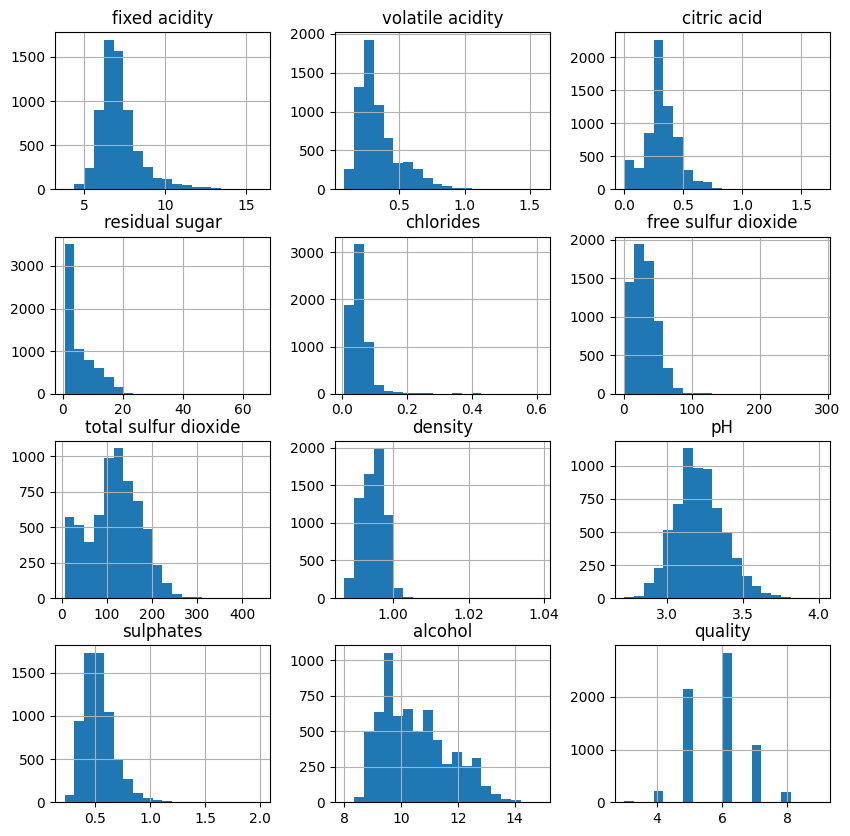

In [20]:
df1.hist(bins=20, figsize=(10,10))
plt.show()

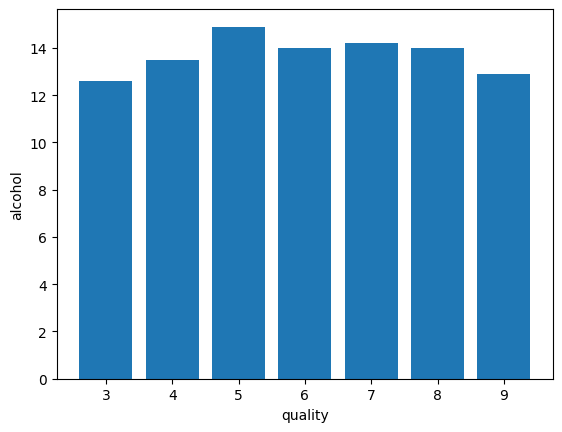

In [21]:
plt.bar(df1['quality'],df1['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

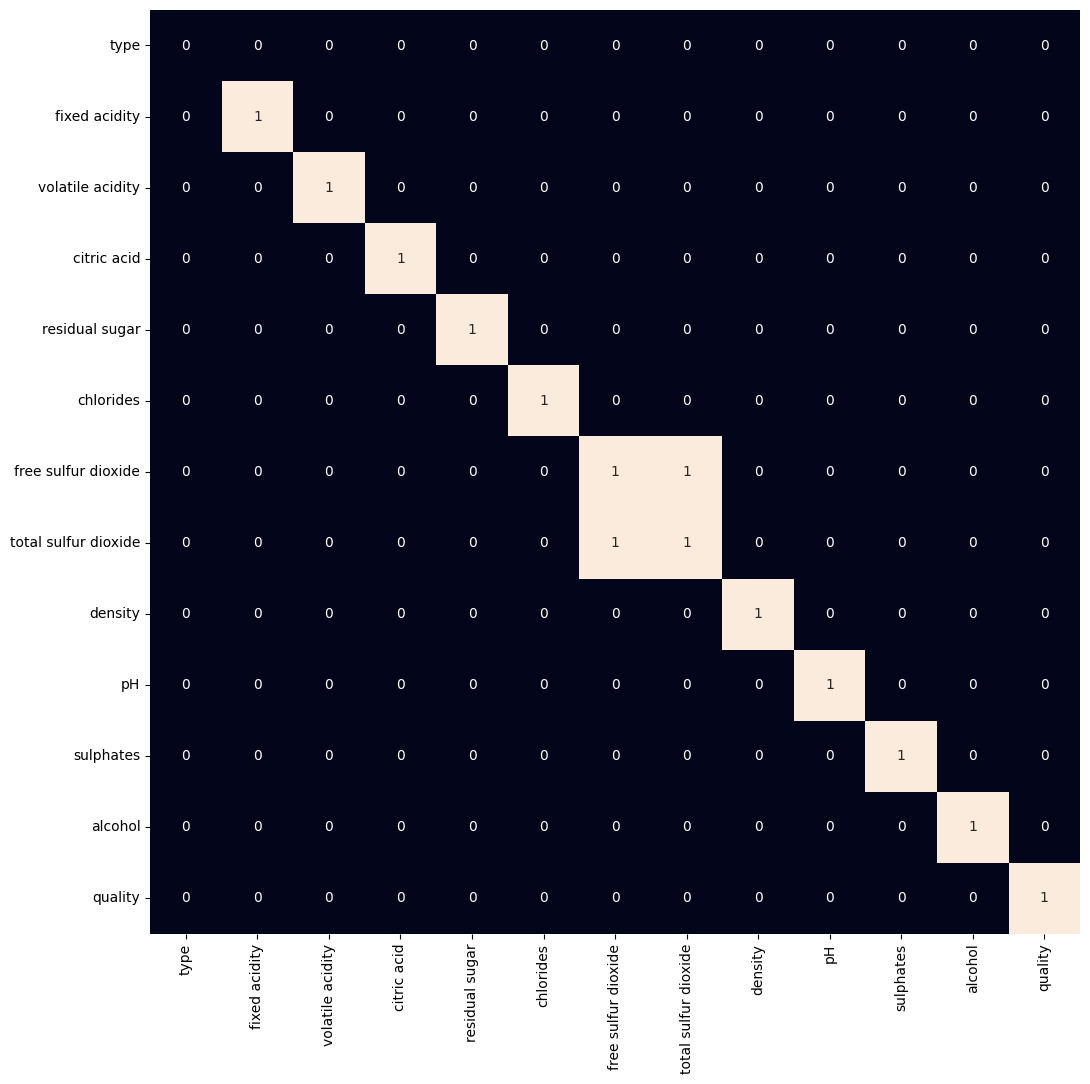

In [22]:
#Convert object columns to numbers
for col in df1.columns:
  if df1[col].dtype=='object':
    try:
      df1[col]=pd.to_numeric(df1[col],errors='coerce')
    except:
      pass


plt.figure(figsize=(12,12))
sns.heatmap(df1.corr()>0.7,annot=True,cbar=False)
plt.show()

In [23]:
#as free sulfur dioxide and tital sulfur dioxide is highly correlated  remove one
df1.drop('total sulfur dioxide',axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 0 non-null      float64
 1   fixed acidity        6497 non-null   float64
 2   volatile acidity     6497 non-null   float64
 3   citric acid          6497 non-null   float64
 4   residual sugar       6497 non-null   float64
 5   chlorides            6497 non-null   float64
 6   free sulfur dioxide  6497 non-null   float64
 7   density              6497 non-null   float64
 8   pH                   6497 non-null   float64
 9   sulphates            6497 non-null   float64
 10  alcohol              6497 non-null   float64
 11  quality              6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [29]:
#to find best quality
df1['best quality']=[1 if x>5 else 0 for x in df1.quality]
df1['best quality']

,best quality
0,1
1,1
2,1
3,1
4,1
...,...
6492,0
6493,1
6494,1
6495,0


In [31]:
#encoding
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# df1['type']=le.fit_transform(df1['type'])
# df1

df1.replace({'white':1,'red':0},inplace=True)
df1

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.450000,8.8,6,1
1,0,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.490000,9.5,6,1
2,0,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.440000,10.1,6,1
3,0,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,6,1
4,0,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.580000,10.5,5,0
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.531215,11.2,6,1
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.750000,11.0,6,1
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.710000,10.2,5,0


In [34]:
# features=features.fillna(features.mean())
features=df1.drop(['quality','best quality'],axis=1)
target=df1['best quality']


In [35]:
#train model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=40)

In [36]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
x_train=imputer.fit_transform(x_train)
x_test=imputer.transform(x_test)

x_train.shape,x_test.shape

((5197, 11), (1300, 11))

In [37]:
#normalising
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [45]:
#model
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression as logisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RandomForest
from xgboost import XGBClassifier


models=[logisticRegression(),XGBClassifier(),SVC(kernel='rbf'),RandomForest()]

for i in range(len(models)):
  models[i].fit(x_train,y_train)
  print(f'{models[i]} : ')

  print('Training Accuracy : ',metrics.roc_auc_score(y_train,models[i].predict(x_train)))
  print('Testing Accuracy : ',metrics.roc_auc_score(y_test,models[i].predict(x_test)))
  print()

LogisticRegression() : 
Training Accuracy :  0.6968344278667192
Testing Accuracy :  0.6865607216926675

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9762240429934201
Testing Accuracy :  0.8045662590288206

SVC() : 
Training Accuracy :  0.7179995922378656
Testin

LogisticRegression() : 


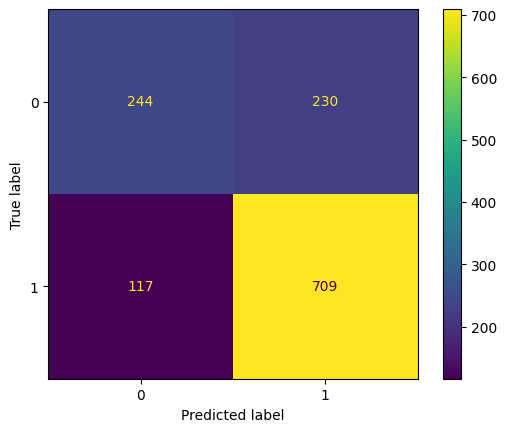

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 


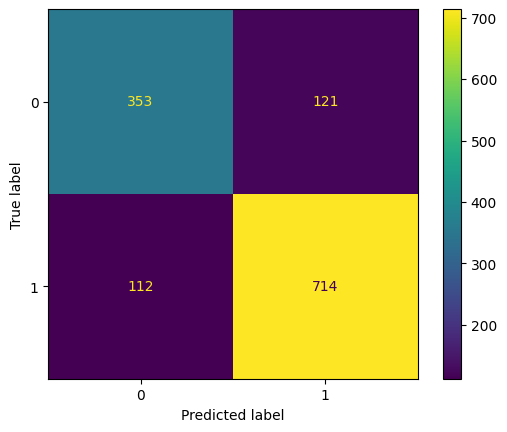

SVC() : 


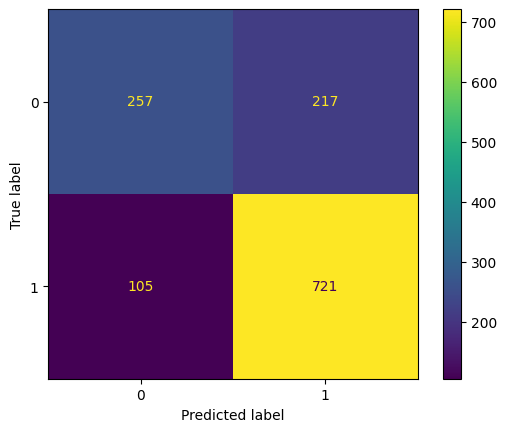

RandomForestClassifier() : 


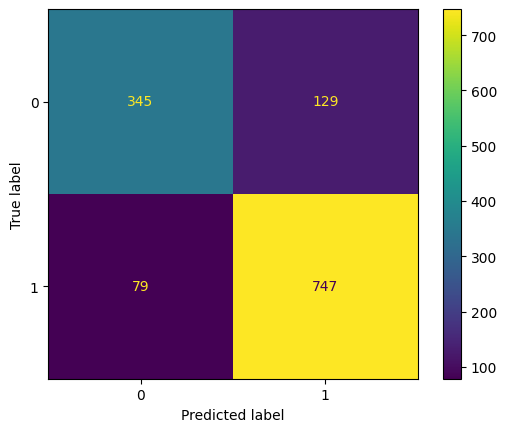

In [46]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
for i in range(len(models)):
  print(f'{models[i]} : ')
  cm=confusion_matrix(y_test,models[i].predict(x_test))
  disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=models[i].classes_)
  disp.plot()
  plt.show()

In [51]:
#taking xbgclassifi ir model[1]
print(models[1])
print(metrics.classification_report(y_test,models[1].predict(x_test)))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       474
           1       0.86      0.86      0.86       826

    accuracy                           0.82      1300
   macro avg       0.81 

In [50]:
#taking rf model[-1]
print(models[-1])
print(metrics.classification_report(y_test,models[-1].predict(x_test)))

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       474
           1       0.85      0.90      0.88       826

    accuracy                           0.84      1300
   macro avg       0.83      0.82      0.82      1300
weighted avg       0.84      0.84      0.84      1300

